Final Project Group 3 - German Automotive Industry 

In [8]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     

For Our Project, we will be looking at the Resale Automotive Industry('Used Car) in Germany. 

To guide the direction of our analysis, we thought through the potential questions and insights our client who operates in the 'Used Car' industry may have. 

Here are six potential questions our client might ask related to the 'Used Car' Industry:

Market Trends: What are the most common car brands and models sold in Germany?
Pricing Analysis: What factors influence the price of a car (e.g., brand, mileage, year, fuel type)?
Regional Insights: Are there regional differences in car preferences or pricing?
Demand Insights: What is the average age and mileage of cars sold, and how does this differ by brand?
Fuel Economy: Which brands or models provide the best fuel efficiency?
Market Gaps: Are there any segments (price range, mileage, year) where supply is low compared to demand?

After a meeting with our client, we identified our client's problems and objective and summarized in the points below: 

Problem 1: Understanding Market Demand:
The client wants to identify which car brands/models and price points are most popular to better target inventory or marketing efforts.

Problem 2: Optimizing Pricing Strategies:
The client needs insights into how various factors (e.g., mileage, age, fuel type) affect car pricing to better predict and set competitive prices.

In [9]:
# Update the path to the location of your dataset and load the dataset

used_cars_df = pd.read_csv("C:/Users/ReDI_NRW_800/Downloads/Database/German_Cars_Database.csv")

In [10]:
#Explore dataset

used_cars_df.head(10)

,make,model,year,mileage,hp,gear,fuel,price
0,Volkswagen,up,2019,31997,60,manual,gasoline,10190
1,Volkswagen,Polo,2022,100,95,manual,gasoline,24390
2,Volkswagen,Golf,2019,44607,116,manual,diesel,18630
3,Volkswagen,Tiguan,2019,42934,150,automatic,diesel,29990
4,Volkswagen,T6 Multivan,2021,10645,204,automatic,diesel,79890
5,Volkswagen,California,2021,0,114,automatic,gasoline,44393
6,Volkswagen,T-Roc,2021,8963,150,automatic,gasoline,34895
7,Volkswagen,Golf Variant,2019,96485,116,manual,diesel,17590
8,Volkswagen,Polo,2018,29732,116,automatic,gasoline,18980
9,Volkswagen,Sharan,2020,28840,177,automatic,diesel,44570


In [11]:
# Check number of rows and columns

used_cars_df.shape


(144840, 8)

In [12]:

# Overview of column data types and missing values
used_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   make     144840 non-null  object
 1   model    144840 non-null  object
 2   year     144840 non-null  int64 
 3   mileage  144840 non-null  int64 
 4   hp       144840 non-null  int64 
 5   gear     144840 non-null  object
 6   fuel     144840 non-null  object
 7   price    144840 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.8+ MB


In [14]:
# Statistical summary for numerical columns
used_cars_df.describe()

,year,mileage,hp,price
count,144840.000000,144840.000000,144840.000000,1.448400e+05
mean,2020.022397,23922.474579,176.288449,3.773257e+04
std,1.715864,28190.574548,88.576224,2.508925e+04
min,2012.000000,0.000000,1.000000,5.549000e+03
25%,2019.000000,20.000000,120.000000,2.347000e+04
50%,2020.000000,14090.000000,150.000000,3.170300e+04
75%,2021.000000,37147.500000,197.000000,4.399000e+04
max,2022.000000,150000.000000,843.000000,1.550000e+06


In [ ]:
#Inspect Column contents:
# Unique values in column - Make 
used_cars_df['make'].unique()

array(['Volkswagen', 'Mercedes-Benz', 'Audi', 'BMW', 'Renault', 'Nissan',
       'Abarth', 'Alfa', 'ALPINA', 'Aston', 'Bentley', 'Cadillac',
       'Citroën', 'CUPRA', 'Dacia', 'Dodge', 'DS', 'Fiat', 'Ford',
       'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lada',
       'Land', 'Lexus', 'Maserati', 'Mazda', 'MG', 'MINI', 'Mitsubishi',
       'Opel', 'Peugeot', 'Piaggio', 'Porsche', 'Seat', 'Skoda', 'smart',
       'Ssangyong', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volvo',
       'Polestar'], dtype=object)

In [ ]:
#Inspect Column contents:
# Unique values in column - Model

used_cars_df['model'].unique()

array(['up', 'Polo', 'Golf', 'Tiguan', 'T6 Multivan', 'California',
       'T-Roc', 'Golf Variant', 'Sharan', 'Passat Alltrack', 'Arteon',
       'T6', 'T6 California', 'T6 Kombi', 'T-Cross', 'Crafter', 'C 220',
       'GLA 220', 'GLA 200', 'GLC 200', 'GLC 220', 'A 200', 'E 300',
       'A 250', 'Vito', 'EQB', 'C 200', 'GLE 400', 'CLS 450', 'GLC 300',
       'eVito', 'B 250', 'Citan', 'E 400', 'A3', 'A1', 'Q3', 'A6', 'RS3',
       'Q5', 'A4 Allroad', 'Q2', 'A7', 'Q7', 'TT RS', 'A5', 'A4', '320',
       'i3', 'X3', '118', 'X4', '218', '120', 'X1', '520', 'X5', '125',
       '116', '340', '330', '318', 'M4', '530', 'Kadjar', 'Kangoo',
       'Clio', 'Captur', 'ZOE', 'Megane', 'Twingo', 'Arkana', 'Talisman',
       'Espace', 'Micra', 'Qashqai', 'Primastar', 'Juke', 'X-Trail',
       'Frontier', 'Interstar', 'Leaf', '595C', '595', '595 Competizione',
       '695', '500C', '124 Spider', '500', 'Romeo Stelvio',
       'Romeo Giulietta', 'Romeo Giulia', 'Romeo MiTo', 'D5', 'B3', 'D3',
       

In [ ]:
#Inspect Column contents:
# Unique values in column - Year

used_cars_df['year'].unique()

array([2019, 2022, 2021, 2018, 2020, 2016, 2017, 2015, 2014, 2012, 2013],
      dtype=int64)

In [ ]:
#Inspect Column contents:
# Unique values in column - Mileage

used_cars_df['mileage'].unique()

array([31997,   100, 44607, ..., 15114, 18958, 90321], dtype=int64)

In [25]:
#Inspect Column contents:
# Unique values in column - Price

used_cars_df['price'].unique()

array(['10,190.00', '24,390.00', '18,630.00', ..., '34,844.00',
       '37,839.00', '38,501.00'], dtype=object)

In [29]:
#Identify missing values:
# Count missing values in each column

missing_values = used_cars_df.isnull().sum()
print(missing_values)



make       0
model      0
year       0
mileage    0
hp         0
gear       0
fuel       0
price      0
dtype: int64


In [ ]:
# Top 10 popular makes
top_brands = used_cars_df['make'].value_counts().head(10)

print (top_brands)

make
Volkswagen       16551
Audi             13777
Mercedes-Benz    11416
Skoda            10927
BMW              10178
Ford             10068
Opel              9767
Renault           8915
Seat              8550
Hyundai           4302
Name: count, dtype: int64


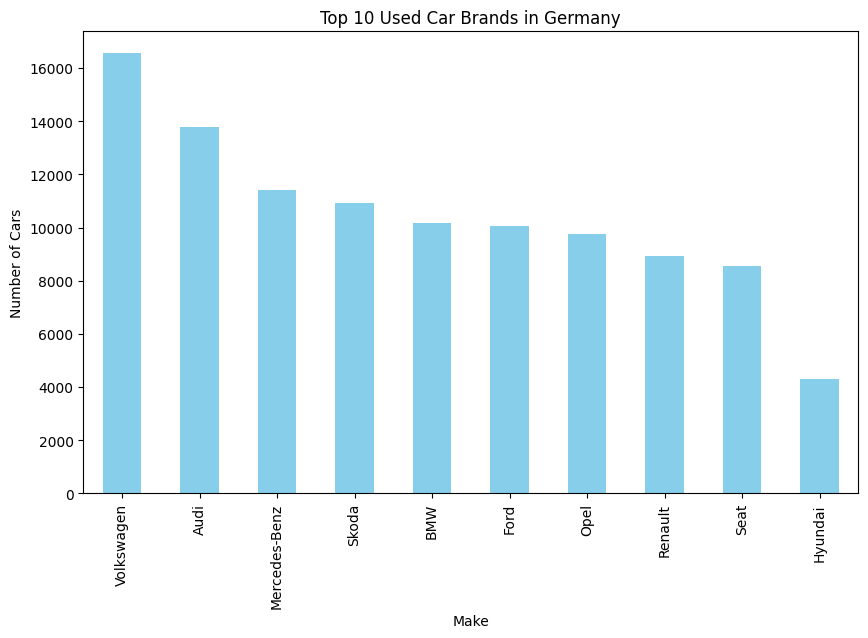

In [33]:
# Plot Top 10 popular makes 

top_brands.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Used Car Brands in Germany")
plt.xlabel("Make")
plt.ylabel("Number of Cars")
plt.show()

In [ ]:
#